<a href="https://colab.research.google.com/github/JulioLaz/Supermarket_Sales_Analysis/blob/fabian_trejo/Supermarket_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supermarket Sales Analysis**

---




#**PROBLEMA DE NEGOCIO**


---

##Una cadena de Supermercados Online que opera en Brasil quiere obtener insights sobre la venta de sus productos. Para hacer esto, usted, como científico de datos, deberá analizar los pedidos de sus clientes y mostrar gráficamente las respuestas de las siguientes preguntas de negocio:

### **Preguntas**

1. ¿Cuáles son las ventas totales por año? ¿Y qué año tuvo mejor desempeño?

2. ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el período?

3. Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas?

4. ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?

5. ¿Cuáles son las ventas totales por trimestre en el estado de São Paulo?

6. ¿Existe otro insight que puedas proporcionar?

# 1. **Configuración del Ambiente**

In [ ]:
#Definimos las variables globales que se usarán en el notebook
global df_ventas, df_ventas_limpio
#Importamos las librerias necesarias para el proyecto
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from IPython.display import clear_output

In [ ]:
#Verificamos que se tengan las versiones correctas de cada librería
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Numpy | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: numpy
Version: 1.23.5
------
Name: matplotlib
Version: 3.7.1


# **2. Obtención y Tratamiento de datos**

In [ ]:
#Primero obtendremos los datos de nuestra base de datos
df_ventas = pd.read_csv('reporte_ventas.csv', sep=',')
print('Información:')
print(df_ventas.info())
print('------------')
print('Duplicados:')
print(df_ventas.duplicated().sum())
print('------------')
print('Registros de prueba:')
print((df_ventas['nombre_cliente']=='prueba').sum())
print('------------')
print('Registros con ganancia <=0:')
print((df_ventas['total_ganancia']<=0).sum())
print('------------')

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_pedido           8954 non-null   object 
 1   fecha_envio            8954 non-null   object 
 2   modo_envio             8954 non-null   object 
 3   nombre_cliente         8952 non-null   object 
 4   segmento_cliente       8954 non-null   object 
 5   ciudad                 8954 non-null   object 
 6   estado                 8954 non-null   object 
 7   region                 8954 non-null   object 
 8   departamento_producto  8954 non-null   object 
 9   tipo_producto          8954 non-null   object 
 10  precio_base            8954 non-null   float64
 11  precio_unit_sin_desc   8954 non-null   float64
 12  descuento              8954 non-null   float64
 13  precio_unit_venta      8954 non-null   float64
 14  cantidad_pedido        8954 non-null   int6

In [ ]:
def obtencion_datos():
  global df_ventas, df_ventas_limpio
  #Ahora formatearemos los datos de las columnas fecha_pedido y fecha_envio
  df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'], format='%Y-%m-%d')
  df_ventas['fecha_envio'] = pd.to_datetime(df_ventas['fecha_envio'], format='%Y-%m-%d')

  #Eliminaremos los duplicados del df_ventas para guardarlo en df_ventas_limpio
  df_ventas_limpio = df_ventas.drop_duplicates()

  #Queremos limpiar también los registros de prueba, eliminandolos del dataframe
  seleccion = df_ventas_limpio['nombre_cliente'] != 'prueba'
  df_ventas_limpio = df_ventas_limpio[seleccion]

  #Vamos a eliminar las filas con valor nulo en la columna nombre_cliente
  df_ventas_limpio.dropna(subset = ['nombre_cliente'], inplace = True)

  #Ahora filtraremos las ventas, quedandonos solo con las que son mayores a cero en ganancia
  seleccion = df_ventas_limpio['total_ganancia'] > 0
  df_ventas_limpio = df_ventas_limpio[seleccion]

  #Finalmente resetearemos el indice del dataset
  df_ventas_limpio.reset_index(inplace = True, drop = True)

In [ ]:
#Ejecutando limpieza
obtencion_datos()
print('Información:')
print(df_ventas_limpio.info())
print('------------')
print('Duplicados:')
print(df_ventas_limpio.duplicated().sum())
print('------------')
print('Registros de prueba:')
print((df_ventas_limpio['nombre_cliente']=='prueba').sum())
print('------------')
print('Registros con ganancia <=0:')
print((df_ventas_limpio['total_ganancia']<=0).sum())
print('------------')

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7210 entries, 0 to 7209
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_pedido           7210 non-null   datetime64[ns]
 1   fecha_envio            7210 non-null   datetime64[ns]
 2   modo_envio             7210 non-null   object        
 3   nombre_cliente         7210 non-null   object        
 4   segmento_cliente       7210 non-null   object        
 5   ciudad                 7210 non-null   object        
 6   estado                 7210 non-null   object        
 7   region                 7210 non-null   object        
 8   departamento_producto  7210 non-null   object        
 9   tipo_producto          7210 non-null   object        
 10  precio_base            7210 non-null   float64       
 11  precio_unit_sin_desc   7210 non-null   float64       
 12  descuento              7210 non-null   float64   

# **3. Preguntas y respuestas**

###**Pregunta 1: ¿Cuáles son las ventas totales por año? ¿Y qué año tuvo mejor desempeño?**

In [ ]:
def pregunta_1():
  global df_ventas_limpio
  #Creando copia del dataframe
  df_ventas_año = df_ventas_limpio[['fecha_pedido', 'total_venta']]
  #Creando la columna año y borrando la fecha de pedido
  df_ventas_año['año'] = df_ventas_año.fecha_pedido.dt.year
  df_ventas_año = df_ventas_año.drop('fecha_pedido', axis=1)
  #Agruparemos los datos por año y los guardaremos en el mismo dataframe
  df_ventas_año = df_ventas_año.groupby('año').sum()

  #Hacemos limpieza de pantalla antes de mostrar el gráfico
  clear_output()
  #Ahora procederemos a hacer las respectivas gráficas de esta pregunta
  fig, ax = plt.subplots(figsize=(10,4))

  #Elegimos los nombres para el eje x y los colores, para luego crear la gráfica
  grupo_nombres = list(df_ventas_año.index)
  colores = ['#CDDBF3', '#CDDBF3', '#CDDBF3', '#0077b6']
  ax.bar(grupo_nombres, df_ventas_año['total_venta'], color=colores, width=0.8)

  #Ahora hacemos los detalles de la gráfica para que sea vea mejor
  ax.set_xticks(grupo_nombres)
  ax.set_title('Ventas totales por año \n (2019-2022)', loc='left', fontsize=15, pad=10)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.tick_params(left = False,
                 bottom = True,
                 labelleft = False,
                 labelbottom = True )

  #Procedemos a colocar el titulo en cada barra
  for bar in ax.patches:
    valor = round(bar.get_height())
    qtd = 'USD$ '+ format(valor,',d').replace(",",".")
    ax.text(bar.get_x()+bar.get_width()/12.0,valor+50000,qtd, fontsize=11)

  #Para calcular el porcentaje y agregar el texto del aumento porcentual
  porcentaje = round((valor/round(ax.patches[-2].get_height())-1)*100,2)
  insight = ' En '+r'$\bf{'+str(2022)+'}$'+', las ventas \n en el Supermercado subieron \n aproximadamente '+r'$\bf{'+str(porcentaje)+'}$'+'%\n comparado con el año anterior.'
  plt.text(2022.5, df_ventas_año.total_venta.max()-550000, insight, fontsize=14, color='#0077b6')

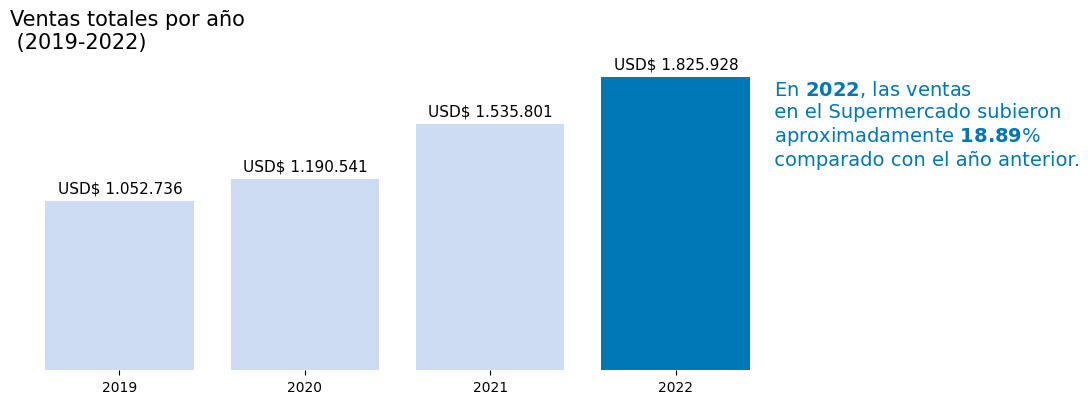

In [ ]:
pregunta_1()

###**Pregunta 6: ¿Cuáles son los articulos que obtienen mejor o peor ganancia relativa en el 2022?**

Para esta pregunta, en primer lugar evaluaremos si TODOS los registros con ganancias negativas corresponden a la aplicación de descuentos al precio final con respecto al precio base, asumiendo que el precio base corresponde a los costos a los que incurre el supermercado para cada articulo.

In [ ]:
def obtencion_datos2():
  global df_ventas, df_ventas_limpio
  #Ahora formatearemos los datos de las columnas fecha_pedido y fecha_envio
  df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'], format='%Y-%m-%d')
  df_ventas['fecha_envio'] = pd.to_datetime(df_ventas['fecha_envio'], format='%Y-%m-%d')

  #Eliminaremos los duplicados del df_ventas para guardarlo en df_ventas_limpio
  df_ventas_limpio = df_ventas.drop_duplicates()

  #Queremos limpiar también los registros de prueba, eliminandolos del dataframe
  seleccion = df_ventas_limpio['nombre_cliente'] != 'prueba'
  df_ventas_limpio = df_ventas_limpio[seleccion]

  #Ahora filtraremos las ventas, verificaremos que los articulos con ganancias negativas corresponden a descuentos otorgados
  #a las mismas, para este caso calcularemos las ganancias restando con el precio_unit_venta del precio_base
  #multiplicandolo con la cantidad_pedido, luego verificamos si esta ganancia es igual a la ganancia de la base
  df_ventas_limpio['total_ganancia_2'] = (df_ventas_limpio['precio_unit_venta']-df_ventas_limpio['precio_base'])*df_ventas_limpio['cantidad_pedido']
  df_ventas_limpio['verificacion'] = round(df_ventas_limpio['total_ganancia'] - df_ventas_limpio['total_ganancia_2'],2)

  #Finalmente resetearemos el indice del dataset
  df_ventas_limpio.reset_index(inplace = True, drop = True)
  #Ejecutando limpieza
  print('Información:')
  print(df_ventas_limpio.info())
  print('------------')
  print('Duplicados:')
  print(df_ventas_limpio.duplicated().sum())
  print('------------')
  print('Registros de prueba:')
  print((df_ventas_limpio['nombre_cliente']=='prueba').sum())
  print('------------')
  print('Registros con ganancia <=0:')
  print((df_ventas_limpio['total_ganancia']<=0).sum())
  print('------------')
  print('Registros con verificación >0:')
  print((df_ventas_limpio['verificacion']>0).sum())
  print('------------')
  print('Registros con verificación <0:')
  print((df_ventas_limpio['verificacion']<0).sum())
  print('------------')

In [ ]:
obtencion_datos2()

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8935 entries, 0 to 8934
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_pedido           8935 non-null   datetime64[ns]
 1   fecha_envio            8935 non-null   datetime64[ns]
 2   modo_envio             8935 non-null   object        
 3   nombre_cliente         8933 non-null   object        
 4   segmento_cliente       8935 non-null   object        
 5   ciudad                 8935 non-null   object        
 6   estado                 8935 non-null   object        
 7   region                 8935 non-null   object        
 8   departamento_producto  8935 non-null   object        
 9   tipo_producto          8935 non-null   object        
 10  precio_base            8935 non-null   float64       
 11  precio_unit_sin_desc   8935 non-null   float64       
 12  descuento              8935 non-null   float64   

Como pudimos ver en la verificación anterior, las ganancias negativas efectivamente corresponden a los descuentos implementados en cada venta, por lo que para este análisis no descartaremos dichos registros y procederemos a calcular la ganancia relativa de cada producto (es decir, ganancia, ya sea negativa o positiva, entre el valor_base) para saber a cual o a cuales articulos se debería hacer una campaña de Marketing para obtener más ganancias a bajo costo para el supermercado. Adicionalmente con las ganancias relativas negativas obtendremos los articulos que pueden estar en sobreexistencia en el supermercado o a los que se podría modificar el descuento para evitar caer en grandes perdidas a futuro.

In [ ]:
def pregunta_6():
  global df_ventas_limpio
  #Creando copia del dataframe
  df_ventas_relativo = df_ventas_limpio[['fecha_pedido', 'region', 'tipo_producto', 'total_venta', 'total_ganancia']]
  seleccion = df_ventas_relativo['fecha_pedido'] > "2021-12-31"
  df_ventas_relativo = df_ventas_relativo[seleccion]
  df_top_ganancias = df_ventas_relativo.groupby('tipo_producto').agg({'total_ganancia':'sum'}).sort_values(by='total_ganancia', ascending=False)
  df_top_ganancias = pd.unique(df_top_ganancias.head(5).index)
  df_top_perdidas = df_ventas_relativo.groupby('tipo_producto').agg({'total_ganancia':'sum'}).sort_values(by='total_ganancia')
  df_top_perdidas = pd.unique(df_top_perdidas.head(5).index)
  seleccion = (df_ventas_relativo['tipo_producto'].isin(df_top_ganancias)) | (df_ventas_relativo['tipo_producto'].isin(df_top_perdidas))
  df_ventas_relativo = df_ventas_relativo[seleccion]
  #Creando la columna fecha_final_mes y borrando la fecha del pedido
  #df_ventas_relativo['fecha_final_mes'] = df_ventas_relativo['fecha_pedido'] + pd.offsets.MonthEnd(0)
  df_ventas_relativo['mes'] = df_ventas_relativo.fecha_pedido.dt.month
  df_ventas_relativo = df_ventas_relativo.drop('fecha_pedido', axis=1)

  #Agruparemos por año, mes y tipo de producto
  df_ventas_relativo = df_ventas_relativo.groupby(['mes', 'tipo_producto']).agg({'total_ganancia':'sum', 'total_venta':'sum'})
  df_ventas_relativo = df_ventas_relativo.sort_values('total_ganancia',ascending=False).swaplevel(0,1).sort_index(level=1, sort_remaining=False).swaplevel(0,1)
  df_ventas_relativo['%ganancia_relativa'] = 100*df_ventas_relativo['total_ganancia']/df_ventas_relativo['total_venta']
  #Eliminaremos las columnas de total_ganancia y total_venta
  df_ventas_relativo = df_ventas_relativo.drop('total_ganancia', axis=1)
  df_ventas_relativo = df_ventas_relativo.drop('total_venta', axis=1)
  #Hacemos limpieza de pantalla antes de mostrar el gráfico
  clear_output()
  #print(df_ventas_relativo.head(15))
  #print(df_ventas_relativo.info())

  #Ahora procederemos a hacer gráfica de esta pregunta
  fig, ax = plt.subplots(figsize=(18,8))

  for key, grp in df_ventas_relativo.groupby(level=1):
    ax.plot(grp.index.get_level_values(0), grp.values, label=key, marker=".")

  ax.set_title('%Ganancia relativa de acuerdo \n al precio base por articulo en el año 2022', loc='center', fontsize=25, pad=10)
  ax.axhline(0, color = 'k', linestyle='--')
  plt.xlabel('Meses', fontsize=15)
  #xticks=['Ene','Feb','Mar','Abr', 'May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']
  xticks=['Dic','Mar','Jun','Sep','Dic']
  major_ticks = np.arange(0, 13, 3)
  minor_ticks = np.arange(0, 13, 1)
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.set_xticklabels(xticks)
  ax.grid(which='both')
  plt.ylabel('Ganancia relativa (%)', fontsize=15)
  ax.yaxis.set_major_formatter(mtick.PercentFormatter())
  #get handles and labels
  handles, labels = plt.gca().get_legend_handles_labels()
  #specify order of items in legend
  order = [0,7,2,8,3,6,4,5,1,9]
  #add legend to plot
  plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
  # Rellenar el área debajo de la línea cero con color transparente rojo
  ax.fill_between([1, 12], 0, (df_ventas_relativo.min().min())*1.1, color='red', alpha=0.2)
  ax.fill_between([1, 12], 0, (df_ventas_relativo.max().max())*1.1, color='green', alpha=0.2)

  x1 = df_ventas_relativo['%ganancia_relativa'].idxmax()[0]
  y1 = max(df_ventas_relativo['%ganancia_relativa'])
  x2 = df_ventas_relativo['%ganancia_relativa'].idxmax()[0] - 2
  y2 = max(df_ventas_relativo['%ganancia_relativa']) + 2
  ax.annotate("Máximo", xy=(x1,y1), fontsize=20,xytext=(x2,y2), arrowprops=dict(facecolor='k'))
  x1 = df_ventas_relativo['%ganancia_relativa'].idxmin()[0]
  y1 = min(df_ventas_relativo['%ganancia_relativa'])
  x2 = df_ventas_relativo['%ganancia_relativa'].idxmin()[0] - 2
  y2 = min(df_ventas_relativo['%ganancia_relativa']) + 2
  ax.annotate("Mínimo", xy=(x1,y1), fontsize=20,xytext=(x2,y2), arrowprops=dict(facecolor='k'))
  ax.axhline(max(df_ventas_relativo['%ganancia_relativa']), color = 'k', linestyle='--')
  ax.axhline(min(df_ventas_relativo['%ganancia_relativa']), color = 'k', linestyle='--')
  insight = 'La mayoría de artículos durante el 2022 han tenido rendimientos relativos positivos, destacan las bolsas de basura, las laptops y smarthphones \npor mantener el rendimiento durante todo el año por arriba del 9%, lo cual sirve para generar una campaña de marketing sobretodo con los \nsmarthphones y laptops ya que también han tenido grandes pero se podrían incrementar más para obtener mayor beneficio a un menor costo.'
  insight2 = 'Por el lado de pérdidas relativas, podemos observar que las zapatillas siempre tuvieron descuentos durante todo el año, de manera que en \nconjunto obtuvieron ganancias negativas, con esto, se puede mejorar el manejo del inventario de las mismas o los criterios de descuentos \nya que existe pérdida relativa para el supermercado. Finalmente, tenemos otros articulos con pérdidas puntuales en algunos meses como ser \nlos jeans, detergentes (ropa y platos) y las camisetas.'
  ax.text(ax.get_xbound()[0]-1, -36, 'Insight 1:', fontsize=14, color='#495057')
  ax.text(ax.get_xbound()[0], -38, insight, fontsize=14, color='#495057')
  ax.text(ax.get_xbound()[0]-1, -44, 'Insight 2:', fontsize=14, color='#495057')
  ax.text(ax.get_xbound()[0], -48, insight2, fontsize=14, color='#495057')
  plt.plot()
  plt.show()

El siguiente gráfico nos muestra la ganancia relativa de los primeros 5 artículos que más ventas tuvieron y también de los últimos 5 artículos que tuvieron menos ventas durante el año 2022. La ganancia relativa se refiere al porcentaje de ganancia o pérdida considerando que el precio base de cada articulo que se muestra en el dataframe es el costo del mismo para el supermercado. Es decir, nos muestra su "rendimiento" por artículo agrupado por mes en el último año.

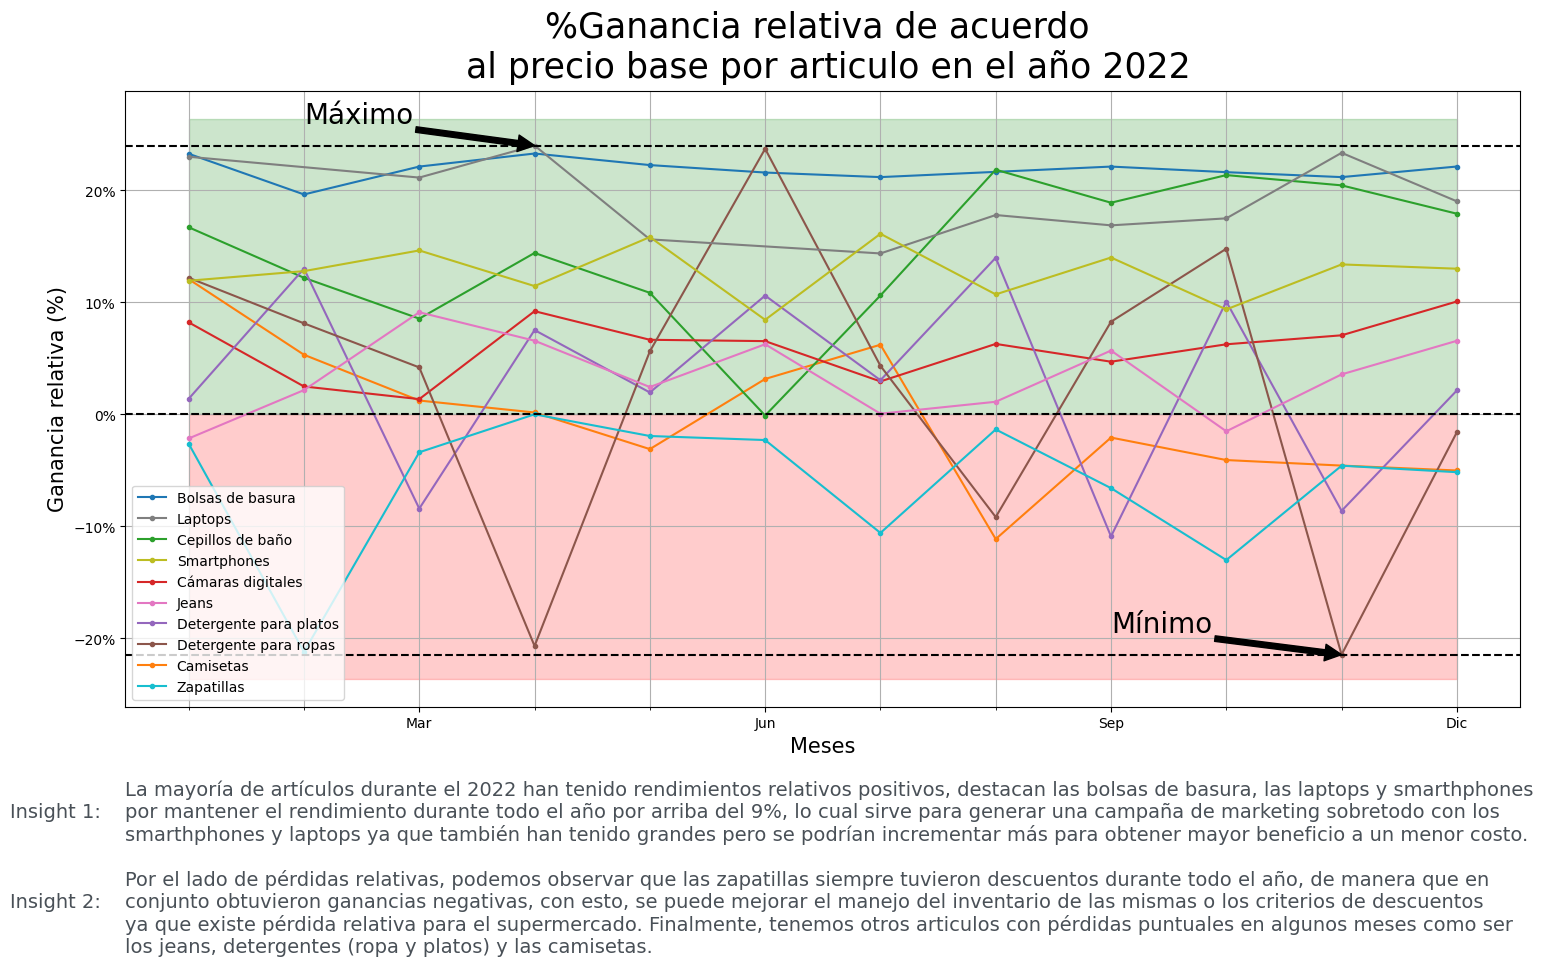

In [ ]:
pregunta_6()